In [38]:
import numpy as np
import pulser
from pulser.devices import DigitalAnalogDevice
from pulser.register import Register
from pulser.pulse import Pulse
from pulser.waveforms import BlackmanWaveform
import networkx as nx
import matplotlib.pyplot as plt

from pulser import Pulse, Sequence, Register
from pulser_simulation import QutipEmulator
from pulser.devices import DigitalAnalogDevice
from pulser.waveforms import InterpolatedWaveform
from scipy.optimize import minimize
from scipy.spatial.distance import pdist, squareform

In [76]:
def anneal(reg, Omega, delta_i=-1, delta_f=1, T:int=4000, draw:bool=False):
    # We choose a median value between the min and the max
    delta_f = -delta_i

    adiabatic_pulse = Pulse(
        InterpolatedWaveform(T, [1e-9, Omega, 1e-9]),
        InterpolatedWaveform(T, [delta_i, 0, delta_f]),
        0,
    )
    seq = Sequence(reg, DigitalAnalogDevice)
    seq.declare_channel("ising", "rydberg_global")
    seq.add(adiabatic_pulse, "ising")

    simul = QutipEmulator.from_sequence(seq)
    results = simul.run()
    final = results.get_final_state()
    count_dict = results.sample_final_state()

    if draw:
        seq.draw()
        plot_distribution(count_dict)
    
    return count_dict

def plot_distribution(C):
    C = dict(sorted(C.items(), key=lambda item: item[1], reverse=True))
    indexes = ["01011", "00111"]  # QUBO solutions
    color_dict = {key: "r" if key in indexes else "g" for key in C}
    plt.figure(figsize=(12, 6))
    plt.xlabel("bitstrings")
    plt.ylabel("counts")
    plt.bar(C.keys(), C.values(), width=0.5, color=color_dict.values())
    plt.xticks(rotation="vertical")
    plt.show()

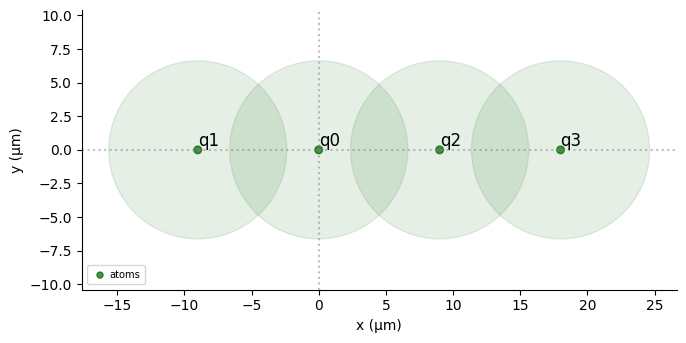

Counter({'1001': 389,
         '0110': 374,
         '0000': 80,
         '0101': 67,
         '0001': 26,
         '0010': 22,
         '1000': 21,
         '0100': 20,
         '1101': 1})

In [79]:
coords = [
    [-0, 0], 
    [-9, 0], 
    [9, 0],
    [18, 0], 
    ]
qubits = {f"q{i}": coord for (i, coord) in enumerate(coords)}
reg = Register(qubits)
reg.draw(
    blockade_radius=DigitalAnalogDevice.rydberg_blockade_radius(1.0),
    draw_graph=False,
    draw_half_radius=True,
)

Omega = 2
delta_i = -1
T = 5000
counts = anneal(reg, Omega, delta_i, draw=False, T=T)
counts

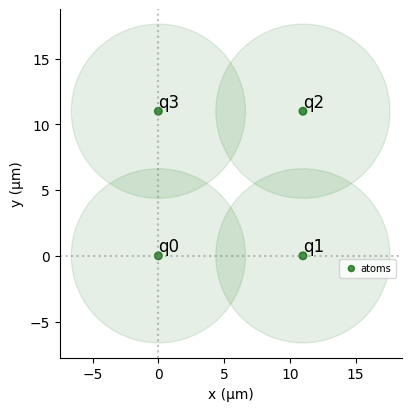

Counter({'1010': 443,
         '0101': 399,
         '0000': 27,
         '0100': 15,
         '1001': 15,
         '1101': 13,
         '1000': 12,
         '1100': 12,
         '1110': 11,
         '0110': 10,
         '1011': 10,
         '0001': 9,
         '0010': 8,
         '0011': 8,
         '0111': 8})

In [80]:
coords = [
    [-0, 0], 
    [11, 0], 
    [11, 11],
    [0, 11], 
    ]
qubits = {f"q{i}": coord for (i, coord) in enumerate(coords)}
reg = Register(qubits)
reg.draw(
    blockade_radius=DigitalAnalogDevice.rydberg_blockade_radius(1.0),
    draw_graph=False,
    draw_half_radius=True,
)

Omega = 5
delta_i = -1
T = 5000
counts = anneal(reg, Omega, delta_i, draw=False, T=T)
counts

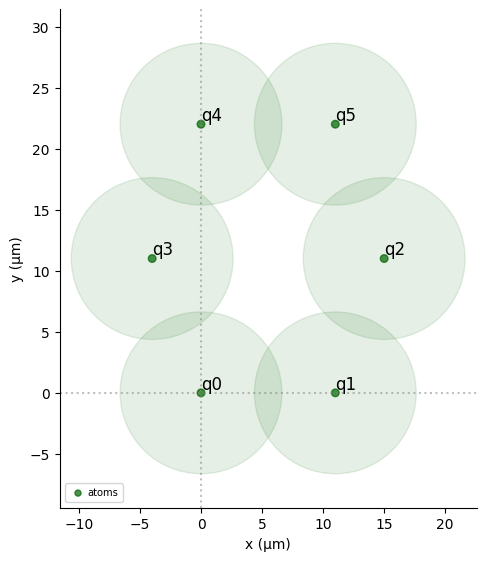

Counter({'101010': 148,
         '010101': 126,
         '101001': 45,
         '000000': 44,
         '010110': 38,
         '011010': 36,
         '101101': 36,
         '100101': 29,
         '001110': 28,
         '011100': 27,
         '011110': 25,
         '101100': 25,
         '010100': 24,
         '000101': 23,
         '001101': 22,
         '010010': 22,
         '001100': 21,
         '100001': 20,
         '100010': 20,
         '101000': 18,
         '010001': 16,
         '011101': 16,
         '101110': 14,
         '111010': 12,
         '000100': 11,
         '101011': 11,
         '001000': 10,
         '001010': 10,
         '110001': 10,
         '110101': 10,
         '000110': 8,
         '001001': 8,
         '010111': 7,
         '100011': 7,
         '100100': 7,
         '010000': 6,
         '010011': 6,
         '110010': 6,
         '011011': 5,
         '011111': 4,
         '100000': 4,
         '000001': 3,
         '000010': 3,
         '011000': 3,


In [81]:
coords = [
    [-0, 0], 
    [11, 0], 
    [15, 11],
    [-4, 11], 
    [-0, 22], 
    [11, 22], 
    ]
qubits = {f"q{i}": coord for (i, coord) in enumerate(coords)}
reg = Register(qubits)
reg.draw(
    blockade_radius=DigitalAnalogDevice.rydberg_blockade_radius(1.0),
    draw_graph=False,
    draw_half_radius=True,
)

Omega = 5
delta_i = -1
T = 5000
counts = anneal(reg, Omega, delta_i, draw=False, T=T)
counts

In [ ]:
coords = [[-0, -11], [-0, 0], [11, 0], [11, -11]]
qubits = {f"q{i}": coord for (i, coord) in enumerate(coords)}
reg = Register(qubits)
reg.draw(
    blockade_radius=DigitalAnalogDevice.rydberg_blockade_radius(1.0),
    draw_graph=False,
    draw_half_radius=True,
)

Omega = 5
delta_i = -1
T = 5000
counts = anneal(reg, Omega, delta_i, draw=False, T=T)
counts